In [249]:
from IPython.display import Image

### Q1. (15pts) 

（Solve by hand)

Given the following learned Bayesian network structure explaining the relationships

between variables in container shipping data:

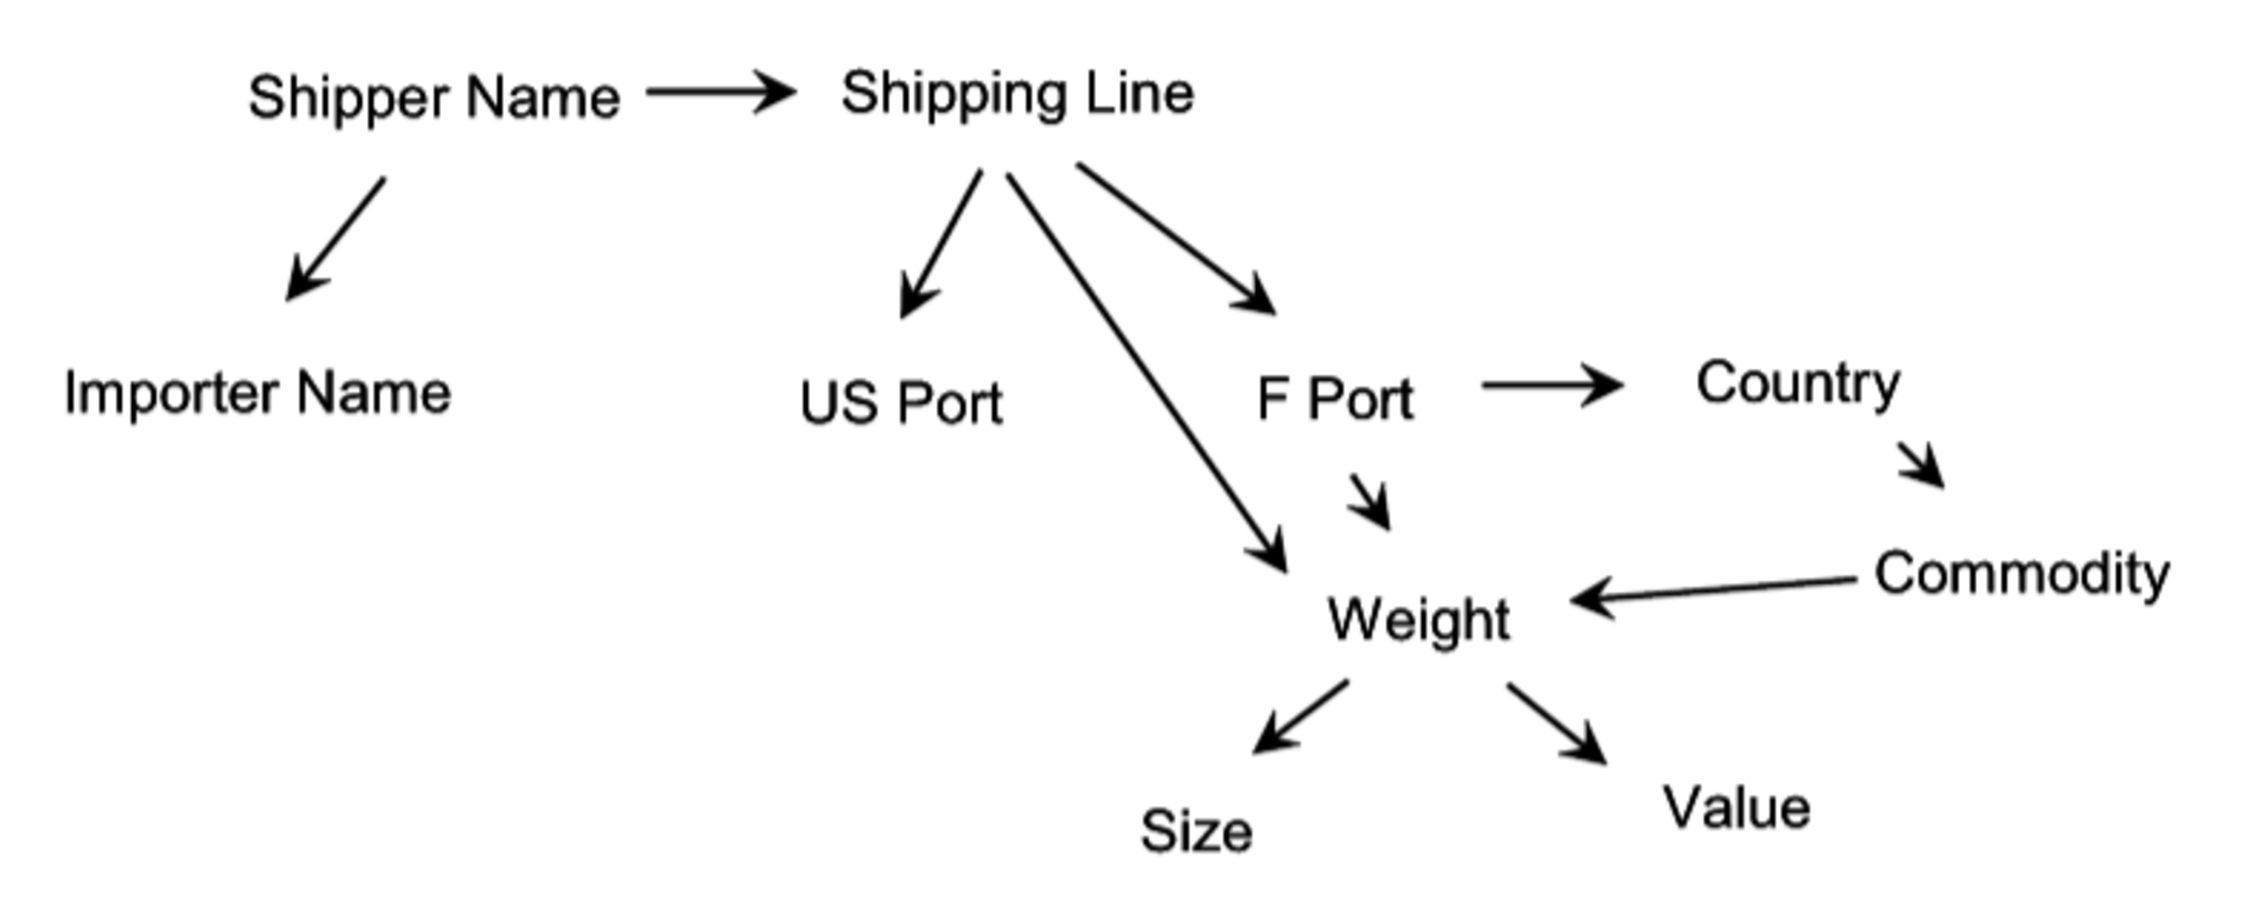

In [250]:
Image('hw3pic.png')

1) Which of the following conditional independence relationships hold? Choose

“Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?   -->   dependent 

(there exists a path from shipper name to value that contains only non-colliders (the path through 'Weight'), and F-Port is not on that path; it's an active path)

CI (Shipper Name, Value | Shipping Line)?   -->   independent

(when the relationship is conditioned on shipping line, that node becomes a blocker for both paths between shipper name and value)

CI (Foreign Port, Commodity | Country)?   -->   independent

(there are two paths from FPort to commodity, one is purely directional and one contains a collider. The directional path contains a conditional node, making that relationship independent. The collider node on the other path is NOT contained in the conditional set, making that path independent too.)

CI (Foreign Port, Commodity | Country, Weight)?   -->  dependent

(in this case, the collider node is contained in the conditional set, making that path active and dependent)

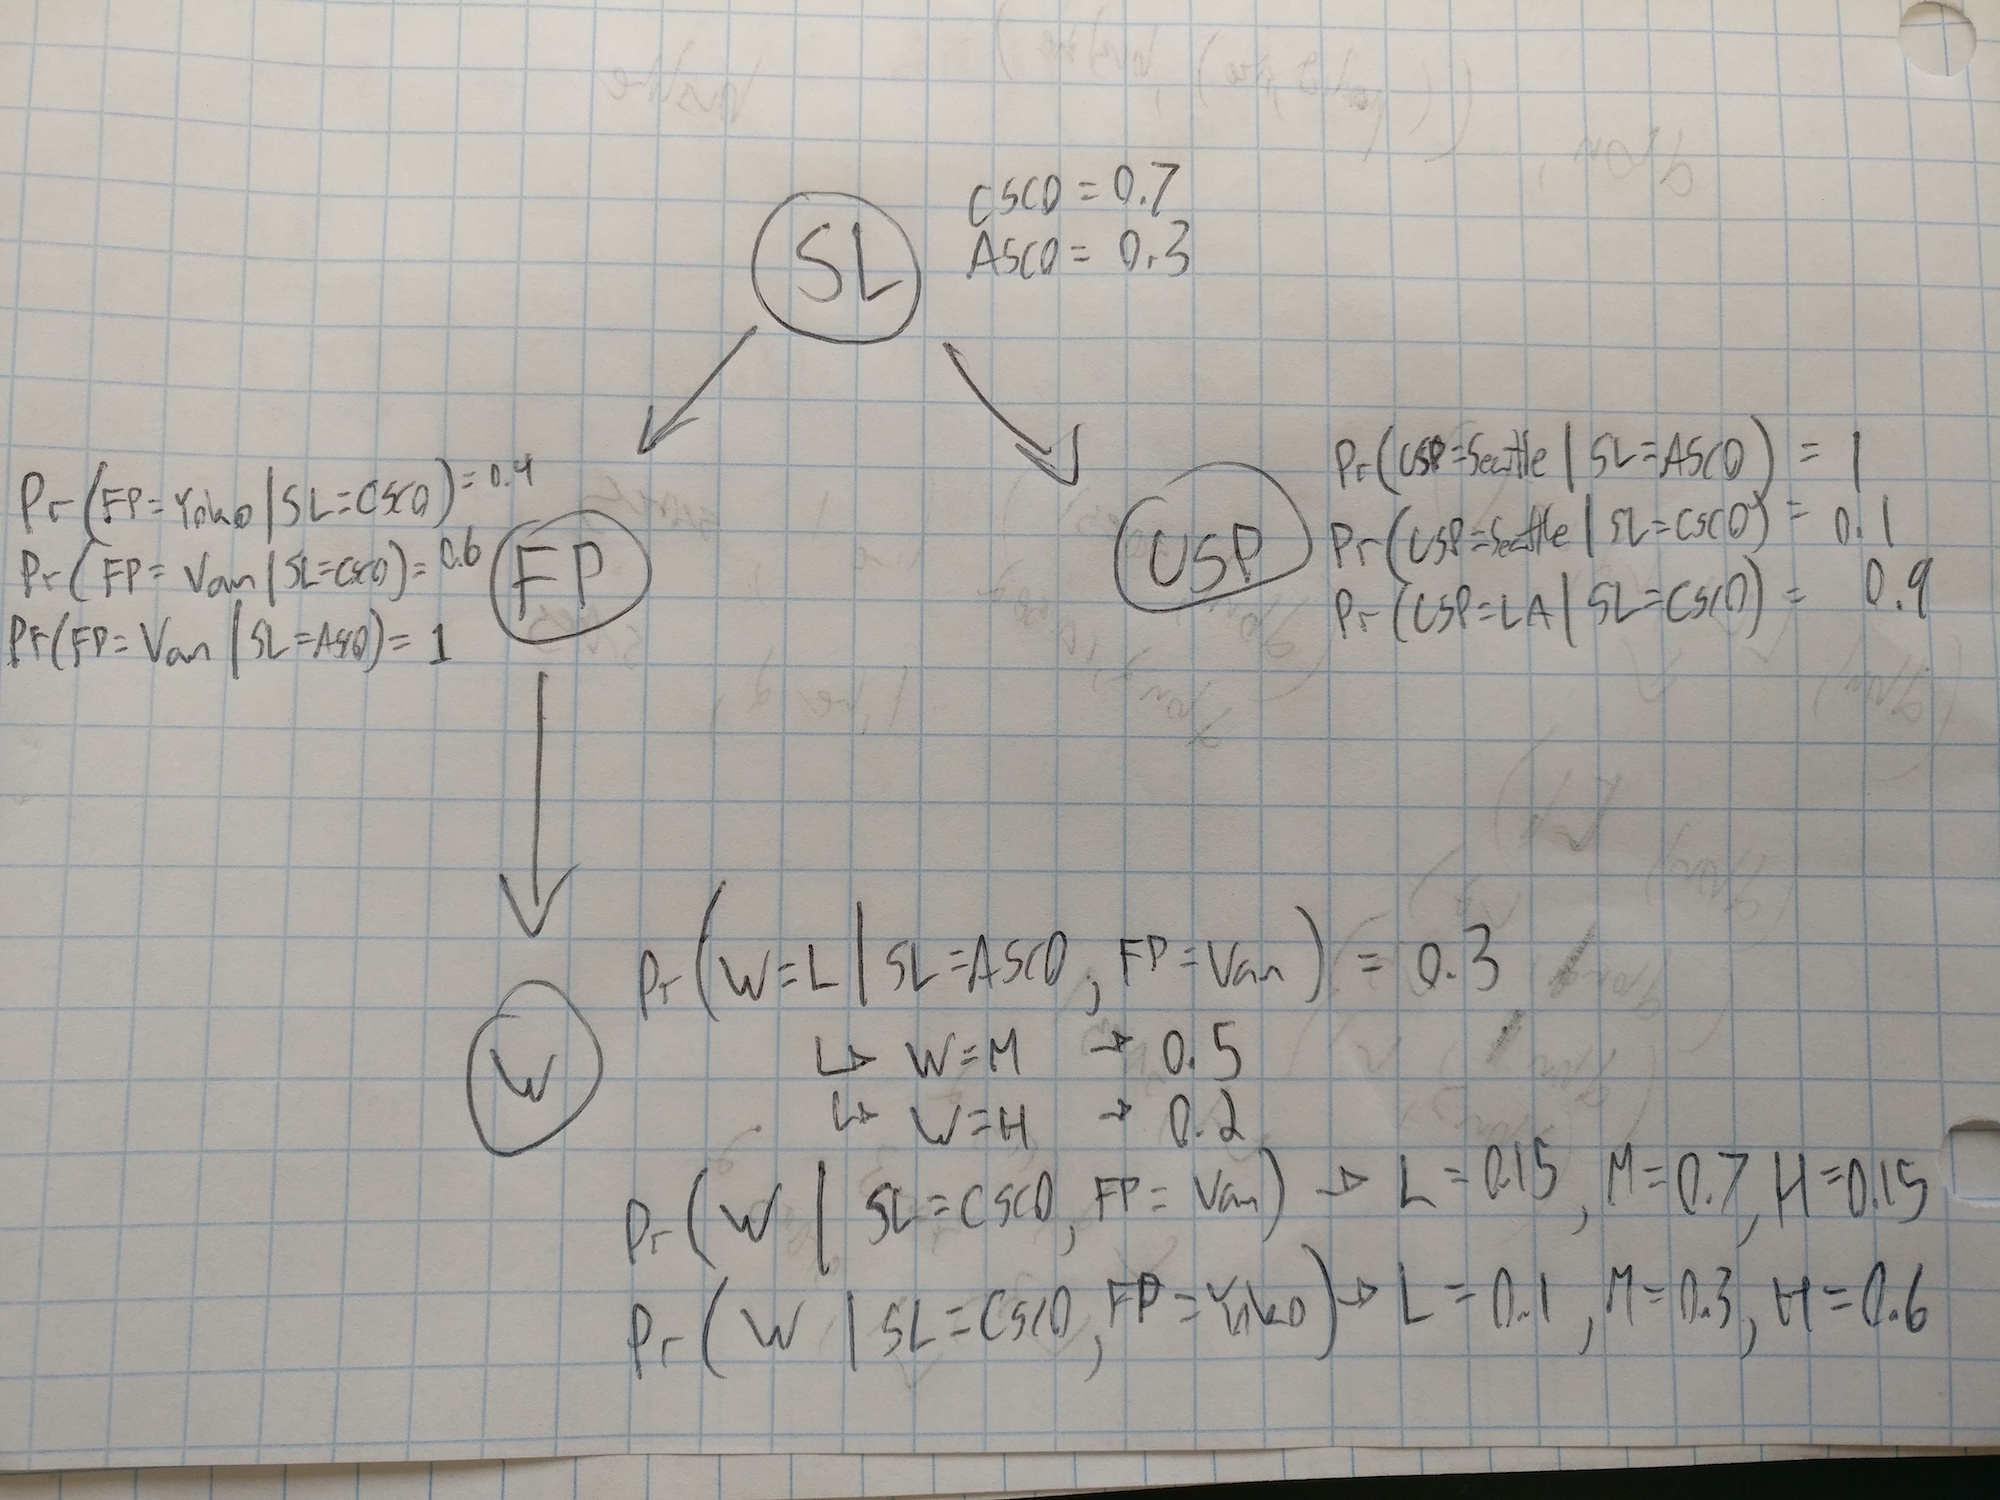

In [251]:
Image('q1pic.jpg')

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US

Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (10%), Los Angeles (90%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

a) A heavy package shipped from Vancouver to Seattle by ASCO

$Pr(SL=ASCO) * Pr(FP=Van|SL=ASCO) * Pr(USP=Seattle|SL=ASCO) * PR(W=heavy|SL=ASCO,FP=Van)$

$liklihood = 0.3 * 1 * 1 * 0.2 = 0.06$

b) A heavy package shipped from Vancouver to Seattle by CSCO

$Pr(SL=CSCO) * Pr(FP=Van|SL=CSCO) * Pr(USP=Seattle|SL=CSCO) * PR(W=heavy|SL=CSCO,FP=Van)$

$liklihood = 0.7 * 0.6 * 0.1 * 0.15 = 0.0063$

b) A heavy package shipped from Yokohama to Los Angeles by CSCO

$Pr(SL=CSCO) * Pr(FP=Yoko|SL=CSCO) * Pr(USP=LA|SL=CSCO) * PR(W=heavy|SL=CSCO,FP=Yoko)$

$liklihood = 0.7 * 0.4 * 0.9 * 0.6 = 0.1512$

#### Most anomolous package is (b)

### Q2. Bayesian Network Learning (35pts)

In this question, we use data: "Q2.csv" for Bayesian Network Learning.

In [1]:
import pandas as pd
data2=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q2.csv")
from sklearn.cross_validation import train_test_split
train, test = train_test_split(data2, random_state=9, test_size=0.4)

/Users/ian/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data2.head()

,A,B,C,D,E,F,G,H
0,2,1,0,0,1,0,1,3
1,4,1,1,2,0,1,0,4
2,3,2,0,0,0,2,0,3
3,4,1,0,0,2,1,2,7
4,5,1,1,2,1,0,2,8


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10pts)

In [10]:
import pandas as pd
import numpy as np
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator

In [13]:
# finding best net structure
hcs = HillClimbSearch(train, scoring_method=BicScore(train))
model = hcs.estimate()

print 'Best structure, using hill climbing w/ BicScore'
model.edges()

Best structure, using hill climbing w/ BicScore


[('A', 'C'), ('A', 'B'), ('A', 'D'), ('H', 'A'), ('H', 'G')]

b) Use Bayesian Estimator to estimate the CPDs for your model and visulize the network with CPDs. (15pts)

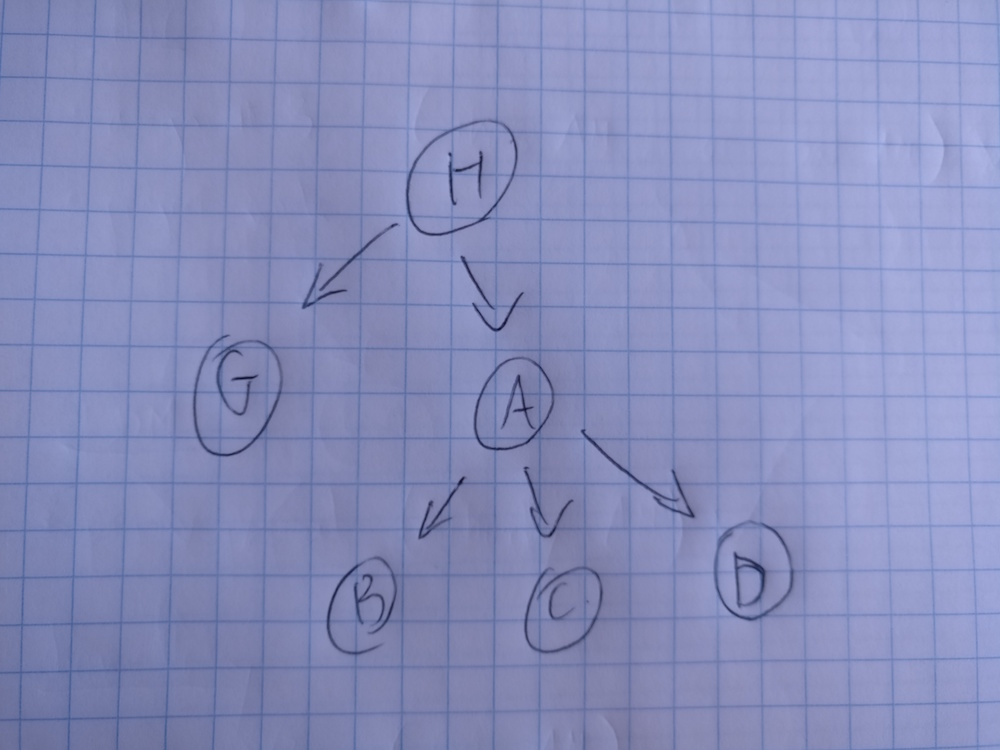

In [253]:
Image('q2pic.jpg')

In [37]:
model.fit(train, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)

for cpd in model.get_cpds():
    print "CPD of {}:".format(cpd.variable)
    print cpd

CPD of A:
+------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+
| H    | H(0)            | H(1)            | H(2)            | H(3)             | H(4)             | H(5)             | H(6)             | H(7)             | H(8)             | H(9)             | H(10)           | H(11)           | H(12)           |
+------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+
| A(0) | 0.407894736842  | 0.210169491525  | 0.223591549296  | 0.0250173731758  | 0.00472813238771 | 0.00270197243988 | 0.00258397932817 | 0.00274047684297 | 0.00361663652803 | 0.00829875518672 | 0.014598540146  | 0.0434782608696 | 0.079365

c) Use the model to predict "A" using the testing dataset. Report the OS prediction accuracy. (10pts) 

In [36]:
# must drop feature A, as that's the one we want to predict
pred = model.predict(test.drop('A', axis = 1))

print 'OS prediction accuracy: {}'.format(float(sum(test.A == pred.A)) / len(test))

OS prediction accuracy: 0.487


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50pts)
In this question you will use k-means clustering in sklearn and hierarchical clustering in scipy. “Do different types of crime display different trends over space and time?”  The dataset “Q3.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

-The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

-The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

-The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

-Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

-Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

-Category = “P2” corresponds to Part 2 (less serious) crimes.

For parts a-f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day attributes.

In [212]:
data3=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3.csv")

In [213]:
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [214]:
from sklearn.cluster import KMeans
plt.style.use('ggplot')
%matplotlib inline

In [215]:
km = KMeans(n_clusters=3, random_state=12)
km.fit(data3.loc[:, ['hour' in c for c in data3.columns]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

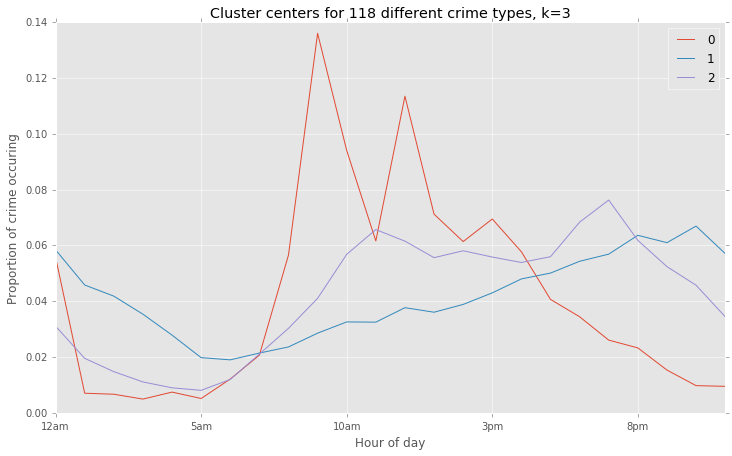

In [216]:
df_hour = pd.DataFrame(km.cluster_centers_).T

fig, ax = plt.subplots()
fig.set_size_inches(12,7)
df_hour.plot(ax=ax, legend=True)
ax.set_title('Cluster centers for 118 different crime types, k=3') 
ax.set_xticklabels(['12am', '5am', '10am', '3pm', '8pm'])
ax.set_xlabel('Hour of day')
ax.set_ylabel('Proportion of crime occuring')
ax.legend()
plt.show()

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

Cluster #0: Mostly day time crime, with extreme peaks at 9am and Noon; this crime seems to coincide with pedestrian traffic at rush hours, and may be associated with smaller, street level crime. Interestingly, there is also a midnight peak - could this be night-time foot traffic (bars, restaurants, ect)?

Cluster #1: These crimes build slowly and consistently throughout the day, and peak late at night (11pm).

Cluster #2: Late morning to early evening crimes; these crimes see stable mid-range levels throughout the day, and taper off to very low levels throughout the night.

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

In [217]:
import collections

In [218]:
label_grouped = pd.DataFrame({'type': data3.crime_type, 'label': km.labels_}).groupby('label')

for label, group in label_grouped:
    print 'cluster {}:'.format(label)
    print collections.Counter(map(lambda t: t.split(': ')[0], group.type))
    print '\n'

cluster 0:
Counter({'DECEPTIVE PRACTICE': 8, 'BATTERY': 1, 'ASSAULT': 1, 'PUBLIC PEACE VIOLATION': 1, 'OTHER OFFENSE': 1})


cluster 1:
Counter({'BATTERY': 10, 'ROBBERY': 9, 'CRIMINAL DAMAGE': 5, 'ASSAULT': 4, 'WEAPONS VIOLATION': 3, 'NARCOTICS': 3, 'MOTOR VEHICLE THEFT': 3, 'CRIM SEXUAL ASSAULT': 2, 'BURGLARY': 2, 'SEX OFFENSE': 2, 'HOMICIDE': 1, 'DECEPTIVE PRACTICE': 1, 'ARSON': 1, 'LIQUOR LAW VIOLATION': 1, 'STALKING': 1, 'CRIMINAL TRESPASS': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'OTHER OFFENSE': 1, 'OFFENSE INVOLVING CHILDREN': 1, 'PROSTITUTION': 1})


cluster 2:
Counter({'OTHER OFFENSE': 15, 'NARCOTICS': 12, 'THEFT': 7, 'DECEPTIVE PRACTICE': 3, 'CRIMINAL TRESPASS': 3, 'OFFENSE INVOLVING CHILDREN': 3, 'BATTERY': 2, 'ASSAULT': 2, 'BURGLARY': 2, 'WEAPONS VIOLATION': 1, 'PUBLIC PEACE VIOLATION': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'SEX OFFENSE': 1, 'GAMBLING': 1})




Cluster #0: This cluster is largely made up of 'deceptive practice'. This category of crime includes financial fraud (bad cheques), so it's possible that banks tend to report these cheques at only certain hours of the day, causing the spikes we see in the graph. Notable that the crime is very low outside of business hours.

Cluster #1: Mostly battery (physical attacks), assault, criminal damage, and robbery. These are the crimes that often involve physical interaction.

Cluster #2: Consists of drug crimes (narcotics), and a catch-all "other" category. The hourly chart shows this cluster to be rather generic - happening throughout the daytime with little variance, and tapering off during the night.

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

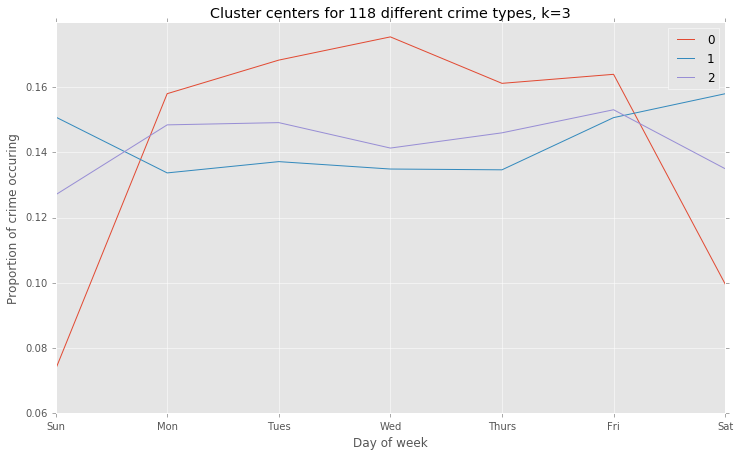

In [219]:
# using original hour-of-day cluster labels, we'll look at trends in day-of-week
df_day = pd.concat([data3.loc[:, ['day' in c for c in data3.columns]],
                    pd.DataFrame(km.labels_)],
                   axis=1)
df_day.columns=['day_Sun', 'day_Mon', 'day_Tue', 'day_Wed',
                'day_Thu', 'day_Fri', 'day_Sat', 'cluster']

# get cluster centers for days of week
df_day = df_day.groupby('cluster').mean().T

fig, ax = plt.subplots()
fig.set_size_inches(12,7)
df_day.plot(ax=ax, legend=True)
ax.set_title('Cluster centers for 118 different crime types, k=3')    
ax.set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])
ax.set_xlabel('Day of week')
ax.set_ylabel('Proportion of crime occuring')
ax.legend()
plt.show()

Cluster #0: As expected, the fraud-related crimes are msotly taking place on weekdays, with the weekly low on sundays when most business is not running.

Cluster #1: The crimes that usually involve physical interaction see a slight increase on weekends. This makes sense, as more people are outside, or at home on their properties, ect.

Cluster #2: Drug crimes and "others" are relatively stable all week long, with a decrease on weekends. Seeing as this is largely the 'catch-all' cluster, it makes sense to see an even distribution, with slightly lower levels on weekends when, in general, less "stuff" is happening.

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file(data4), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  (5 pts)

In [129]:
# combine crime type community area proportions with original cluster labels
df_area = pd.concat([data3.loc[:, ['area' in c for c in data3.columns]],
                    pd.DataFrame(km.labels_)],
                    axis=1)
df_area = df_area.rename(columns = {0:'cluster'})

# this describes the aggregate proportion of each crime category (cluster)
# that is occuring across various community areas
area_summary = df_area.groupby('cluster').mean().T

In [163]:
area_summary.head()

cluster,0,1,2
community_area_1,0.012457,0.013562,0.012605
community_area_2,0.013220,0.012788,0.010340
community_area_3,0.017743,0.012691,0.012486
community_area_4,0.011709,0.006845,0.006408
community_area_5,0.010844,0.004130,0.003062


In [164]:
# a sanity check
area_summary.sum()

cluster
0    1.0
1    1.0
2    1.0
dtype: float64

In [156]:
# for each cluster type, flag the community areas that see crime proportions 
# at any level above two standard deviations from the mean
for cluster in area_summary.columns:
    std = area_summary[cluster].std()
    mean = area_summary[cluster].mean()
    boolmap = map(lambda val: val-mean > (2*std), area_summary[cluster])
    print 'For cluster {}, over-represented communities are:'.format(cluster)
    print list(area_summary[cluster].loc[boolmap].index)
    print '\n'

For cluster 0, over-represented communities are:
['community_area_8', 'community_area_25', 'community_area_28', 'community_area_32']


For cluster 1, over-represented communities are:
['community_area_25', 'community_area_29']


For cluster 2, over-represented communities are:
['community_area_25', 'community_area_29']




In [159]:
data4=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3_2.csv")

# first, what are the "normal" values for these features?
data4.mean()

Community Area Number                           3.900000e+01
centroid_x                                      1.163753e+06
centroid_y                                      1.884761e+06
PERCENT OF HOUSING CROWDED                      4.923377e+00
PERCENT HOUSEHOLDS BELOW POVERTY                2.176623e+01
PERCENT AGED 16+ UNEMPLOYED                     1.537273e+01
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    2.034156e+01
PERCENT AGED UNDER 18 OR OVER 64                3.574675e+01
PER CAPITA INCOME                               2.556317e+04
PERCENT OF HOUSING UNITS VACANT                 1.244293e+01
NUM_CRIMES_2016                                 3.262247e+03
dtype: float64

In [162]:
# look at feature values for the community areas of interest
data4.loc[map(lambda x: x in [8, 25, 28, 29, 32], data4['Community Area Number']), :]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
7,8,Near North Side,1175512.220,1906089.147,1.9,12.9,7.0,2.5,22.6,88669,17.077160,9847
24,25,Austin,1140839.462,1903174.321,6.3,28.6,22.6,24.4,37.9,15957,14.188517,15719
27,28,Near West Side,1167030.371,1898359.955,3.8,20.6,10.7,9.6,22.2,44689,11.790159,8891
28,29,North Lawndale,1152306.328,1892568.863,7.4,43.1,21.2,27.6,42.7,12034,21.888178,8073
31,32,Loop,1176373.765,1899831.267,1.5,14.7,5.7,3.1,13.5,65526,24.629080,8471


We see that both areas 25 and 29 (the areas flagged for high narcotic and assault/battery crime) have povery, crowding, unemployment, and non-education rates that are well above average.

Areas 8, 28, and 32 all have BELOW-average rates in the above categories. Because these neighborhoods were flagged for fraudulent, business, and banking-related crimes, it makes sense that these areas would be more wealthy, business-oriented neighborhoods.

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

In [175]:
cats = pd.concat([data3.Category, pd.Series(km.labels_)], axis=1)
cats.columns = ['cat', 'cluster']

for cluster, group in cats.groupby('cluster'):
        print 'in cluster {}:'.format(cluster)
        print group.cat.value_counts()
        print '\n'

in cluster 0:
P2    12
Name: cat, dtype: int64


in cluster 1:
P2     25
P1V    22
P1P     6
Name: cat, dtype: int64


in cluster 2:
P2     43
P1P     9
P1V     2
Name: cat, dtype: int64




If clustering aligned well with the FBI's categorization, we would expect to see a unique FBI label that is predominant in each of our formed clusters.

Cluster 0 is "purely P2", which is good, except that we also see a lot of P2 in the other two clusters, rendering it meaningless. Cluster 1 doesn't really show any strong patterns, while Cluster 2 is also over-indexed on P2 (but again - this doesn't mean anything, as we see lots of P2 in all three clusters).

Overall - very poor alignment!

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes.  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)

In [207]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster, linkage
#from scipy.cluster.hierarchy import fcluster, linkage
#from scipy.cluster.hierarchy import dendrogram, linkage

In [178]:
# get dataset for clustering
days = data3.loc[:, ['day' in c for c in data3.columns]]

# establish a range of possible cluster numbers to test for in each case
cluster_range = np.arange(2, 11, 1)

In [239]:
# k-means
winner = (0, 0, [])
# testing different cluster numbers with silhouette score
for n in cluster_range:
    km = KMeans(n_clusters=n, random_state=6)
    cluster_labels = km.fit_predict(days)
    sil = silhouette_score(days, cluster_labels)
    if sil > winner[1]:
        winner = (n, sil, cluster_labels)

print 'K-Means:'
print '{} clusters; silhouette score of {}'. format(winner[0], round(winner[1], 3))
print collections.Counter(winner[2])
print '\n'

cats = pd.concat([data3.Category, pd.Series(winner[2])], axis=1)
cats.columns = ['cat', 'cluster']

print 'Alignment with FBI categorization:\n'
for cluster, group in cats.groupby('cluster'):
        print 'in cluster {}:'.format(cluster)
        print group.cat.value_counts()
        print '\n'

K-Means:
2 clusters; silhouette score of 0.237
Counter({1: 60, 0: 59})


Alignment with FBI categorization:

in cluster 0:
P2     31
P1V    21
P1P     7
Name: cat, dtype: int64


in cluster 1:
P2     49
P1P     8
P1V     3
Name: cat, dtype: int64




In [240]:
# Gaussian Mixture
winner = (0, 0, [])
# testing different cluster numbers with silhouette score
for n in cluster_range:
    gm = GaussianMixture(n_components=n, random_state=6).fit(days)
    cluster_labels = gm.predict(days)
    sil = silhouette_score(days, cluster_labels)
    if sil > winner[1]:
        winner = (n, sil, cluster_labels)

print 'Gaussian Mixture:'
print '{} clusters; silhouette score of {}'. format(winner[0], round(winner[1], 3))
print collections.Counter(winner[2])

cats = pd.concat([data3.Category, pd.Series(winner[2])], axis=1)
cats.columns = ['cat', 'cluster']

print 'Alignment with FBI categorization:\n'
for cluster, group in cats.groupby('cluster'):
        print 'in cluster {}:'.format(cluster)
        print group.cat.value_counts()
        print '\n'

Gaussian Mixture:
2 clusters; silhouette score of 0.257
Counter({0: 89, 1: 30})
Alignment with FBI categorization:

in cluster 0:
P2     54
P1V    20
P1P    15
Name: cat, dtype: int64


in cluster 1:
P2     26
P1V     4
Name: cat, dtype: int64




In [241]:
# Hierarchical; single-link
winner = (0, 0, [])
single = linkage(days, 'single')
# testing different cluster numbers with silhouette score
for n in cluster_range:
    cluster_labels = fcluster(single, n, criterion='maxclust')
    sil = silhouette_score(days, cluster_labels)
    if sil > winner[1]:
        winner = (n, sil, cluster_labels)

print 'Hierarchical; single-link:'
print '{} clusters; silhouette score of {}'. format(winner[0], round(winner[1], 3))
print collections.Counter(winner[2])

cats = pd.concat([data3.Category, pd.Series(winner[2])], axis=1)
cats.columns = ['cat', 'cluster']

print 'Alignment with FBI categorization:\n'
for cluster, group in cats.groupby('cluster'):
        print 'in cluster {}:'.format(cluster)
        print group.cat.value_counts()
        print '\n'

Hierarchical; single-link:
2 clusters; silhouette score of 0.638
Counter({1: 118, 2: 1})
Alignment with FBI categorization:

in cluster 1:
P2     79
P1V    24
P1P    15
Name: cat, dtype: int64


in cluster 2:
P2    1
Name: cat, dtype: int64




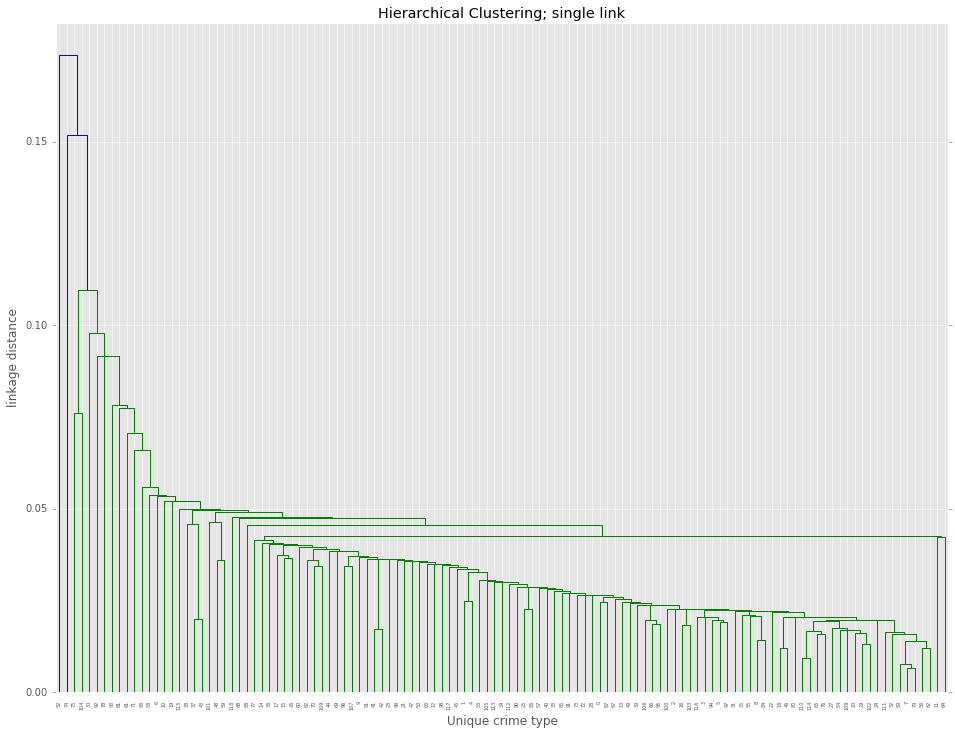

In [229]:
# show a dendogram for the single link clustering
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
dendrogram(
    single,
    truncate_mode=None,  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    #leaf_rotation=90.,
    #leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering; single link')
plt.xlabel('Unique crime type')
plt.ylabel('linkage distance')
plt.show()

In [243]:
# Hierarchical; complete-link
winner = (0, 0, [])
complete = linkage(days, 'complete')
# testing different cluster numbers with silhouette score
for n in cluster_range:
    cluster_labels = fcluster(complete, n, criterion='maxclust')
    sil = silhouette_score(days, cluster_labels)
    if sil > winner[1]: 
        winner = (n, sil, cluster_labels)

print 'Hierarchical; complete-link:'
print '{} clusters; silhouette score of {}'. format(winner[0], round(winner[1], 3))
print collections.Counter(winner[2])

cats = pd.concat([data3.Category, pd.Series(winner[2])], axis=1)
cats.columns = ['cat', 'cluster']

print 'Alignment with FBI categorization:\n'
for cluster, group in cats.groupby('cluster'):
        print 'in cluster {}:'.format(cluster)
        print group.cat.value_counts()
        print '\n'

Hierarchical; complete-link:
2 clusters; silhouette score of 0.61
Counter({2: 117, 1: 2})
Alignment with FBI categorization:

in cluster 1:
P2    2
Name: cat, dtype: int64


in cluster 2:
P2     78
P1V    24
P1P    15
Name: cat, dtype: int64




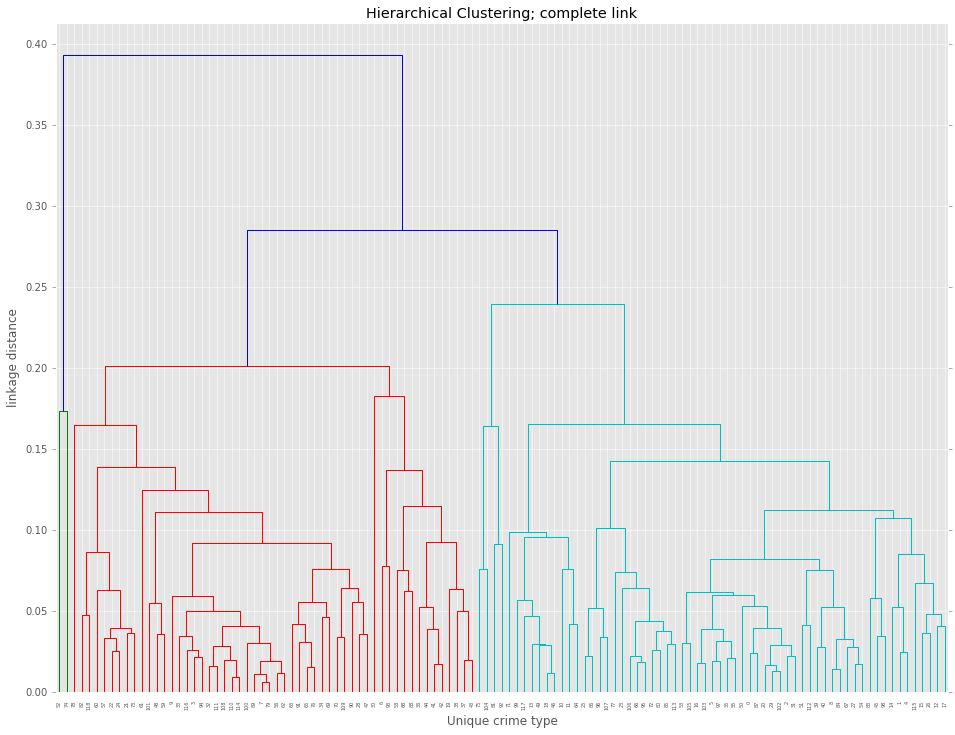

In [245]:
# show a dendogram for the complete link clustering
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
dendrogram(
    complete,
    truncate_mode=None,  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    #leaf_rotation=90.,
    #leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering; complete link')
plt.xlabel('Unique crime type')
plt.ylabel('linkage distance')
plt.show()

It seems that silhouette score may not be the most effective method in choose n-clusters for hierarchal clustering! Let's see what happens to the flat clustes from fcluster() if we force n=3, which would capture more evenly distributed clusters, according to this dendogram.

In [246]:
# Hierarchical; complete-link; force n=3
winner = (0, 0, [])
complete = linkage(days, 'complete')
# testing different cluster numbers with silhouette score
for n in cluster_range:
    cluster_labels = fcluster(complete, n, criterion='maxclust')
    sil = silhouette_score(days, cluster_labels)
    #if sil > winner[1]:
    if n == 3:
        winner = (n, sil, cluster_labels)

print 'Hierarchical; complete-link:'
print '{} clusters; silhouette score of {}'. format(winner[0], round(winner[1], 3))
print collections.Counter(winner[2])

cats = pd.concat([data3.Category, pd.Series(winner[2])], axis=1)
cats.columns = ['cat', 'cluster']

print 'Alignment with FBI categorization:\n'
for cluster, group in cats.groupby('cluster'):
        print 'in cluster {}:'.format(cluster)
        print group.cat.value_counts()
        print '\n'

Hierarchical; complete-link:
3 clusters; silhouette score of 0.173
Counter({3: 63, 2: 54, 1: 2})
Alignment with FBI categorization:

in cluster 1:
P2    2
Name: cat, dtype: int64


in cluster 2:
P2     43
P1P     8
P1V     3
Name: cat, dtype: int64


in cluster 3:
P2     35
P1V    21
P1P     7
Name: cat, dtype: int64




#### Discussion:
K-Means and Gaussian Mixture produced similar silhouette scores, and clusters that were loosely related. Both selected n=2, with one cluster being dominated by 'P2' and 'P1V', and the other cluster primarily 'P2'. Overall, these are somewhat similar sets of clusters.

Single-link hierarchal clustering produced a greedy result, in which one cluster continuously expands across the data set. This means that for any value of n, we'd see very imbalanced cluster sizes (a few small and one large). This doesn't seem to be an effective method for clustering this dataset.

Complete-link hierarchal clustering was more effective in creating meaningful clusters, but we did notice that the silhouette score method failed to choose the best n. With visual inspection of the dendogram, we see that if we increment n from 2 to 3, we can capture much more interesting clusters. Interestingly, at n=3, we see the two primary clusters closely resembling those from k-means and gaussian mixture (in terms of FBI categorization proportions).